In [150]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)
sns.set_style('darkgrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Carregando o dataset

In [151]:
df = pd.read_csv('datatran2022.csv', sep=';', encoding='iso-8859-1')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,405151,2022-01-01,sábado,01:35:00,PI,316.0,415,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,"-7,43280012","-40,68261908",SPRF-PI,DEL04-PI,UOP03-DEL04-PI
1,405158,2022-01-01,sábado,02:40:00,PR,116.0,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,2,1,1,0,0,0,1,1,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
2,405172,2022-01-01,sábado,05:22:00,MS,163.0,393,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Simples,Não Informado,Não,2,0,1,0,1,0,1,2,"-21,228445","-54,456296",SPRF-MS,DEL02-MS,UOP01-DEL02-MS
3,405203,2022-01-01,sábado,07:00:00,RJ,101.0,457,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Curva,Sim,2,0,0,1,1,0,1,2,"-23,03149804","-44,17715297",SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ
4,405207,2022-01-01,sábado,09:00:00,MG,40.0,"508,3",RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,Sem Vítimas,Pleno dia,Decrescente,Chuva,Dupla,Reta,Sim,3,0,0,0,3,0,0,1,"-19,76061249","-44,1347544",SPRF-MG,DEL02-MG,UOP01-DEL02-MG


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64547 entries, 0 to 64546
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      64547 non-null  int64  
 1   data_inversa            64547 non-null  object 
 2   dia_semana              64547 non-null  object 
 3   horario                 64547 non-null  object 
 4   uf                      64547 non-null  object 
 5   br                      64350 non-null  float64
 6   km                      64350 non-null  object 
 7   municipio               64547 non-null  object 
 8   causa_acidente          64547 non-null  object 
 9   tipo_acidente           64547 non-null  object 
 10  classificacao_acidente  64547 non-null  object 
 11  fase_dia                64547 non-null  object 
 12  sentido_via             64547 non-null  object 
 13  condicao_metereologica  64547 non-null  object 
 14  tipo_pista              64547 non-null

In [152]:
df.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,64547.000000,64350.000000,64547.000000,64547.000000,64547.000000,64547.000000,64547.000000,64547.000000,64547.000000,64547.000000
mean,456895.545417,212.692510,2.405472,0.084264,0.849598,0.280912,1.026198,0.164500,1.130510,1.652982
std,27163.593029,130.784085,2.069921,0.334792,1.073940,0.615196,1.636206,0.505713,1.202904,0.723022
min,405147.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,443047.500000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,461064.000000,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,479342.500000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,517156.000000,495.000000,75.000000,7.000000,50.000000,31.000000,56.000000,54.000000,55.000000,21.000000


In [153]:
df.dtypes

id                          int64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                   object
longitude                  object
regional                   object
delegacia                  object
uop           

In [154]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

# Pré-processamento 

# Valores nulos

In [155]:
df.isna().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        197
km                        197
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    3
delegacia                 759
uop                        48
dtype: int64

In [156]:
df[df[['br','km']].isna().any(axis=1)]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
493,408663,2022-01-14,sexta-feira,20:30:00,BA,NaN,NaN,BARREIRAS,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Não Informado,Céu Claro,Simples,Reta,Não,2,1,0,0,1,0,0,1,"-12,1376959","-44,921313",SPRF-BA,DEL10-BA,UOP01-DEL10-BA
600,409451,2022-01-17,segunda-feira,13:00:00,MS,NaN,NaN,BATAGUASSU,Problema com o freio,Incêndio,Sem Vítimas,Pleno dia,Não Informado,Sol,Simples,Reta,Não,1,0,0,0,1,0,0,1,"-21,72532","-52,256202",SPRF-MS,DEL02-MS,UOP04-DEL02-MS
1147,411812,2022-01-29,sábado,15:00:00,RO,NaN,NaN,ARIQUEMES,Problema com o freio,Colisão com objeto,Sem Vítimas,Pleno dia,Não Informado,Céu Claro,Simples,Desvio Temporário,Sim,1,0,0,0,1,0,0,1,"-9,93398403","-63,05522959",SPRF-RO,DEL03-RO,UOP01-DEL03-RO
1203,412194,2022-01-31,segunda-feira,16:45:00,PB,NaN,NaN,JOAO PESSOA,Velocidade Incompatível,Colisão com objeto,Com Vítimas Feridas,Pleno dia,Não Informado,Céu Claro,Simples,Reta,Sim,5,0,2,0,3,0,2,3,"-7,15886802","-34,90628504",SPRF-PB,DEL01-PB,UOP02-DEL01-PB
1547,413707,2022-01-31,segunda-feira,20:00:00,PE,NaN,NaN,RECIFE,Reação tardia ou ineficiente do condutor,Colisão transversal,Sem Vítimas,Plena Noite,Não Informado,Garoa/Chuvisco,Simples,Curva,Sim,2,0,0,0,1,1,0,2,"-8,08485816","-34,8864538",SPRF-PE,DEL06-PE,UOP01-DEL06-PE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62928,494899,2022-12-24,sábado,02:20:00,PB,NaN,NaN,MAMANGUAPE,Transitar na contramão,Colisão lateral sentido oposto,Com Vítimas Feridas,Plena Noite,Não Informado,Chuva,Simples,Reta,Não,4,0,1,2,0,1,3,2,"-6,82975098","-35,13756194",SPRF-PB,DEL01-PB,UOP04-DEL01-PB
63347,495458,2022-12-26,segunda-feira,18:15:00,DF,NaN,NaN,BRASILIA,Ingestão de álcool pelo condutor,Colisão lateral sentido oposto,Sem Vítimas,Anoitecer,Não Informado,Nublado,Simples,Reta,Sim,4,0,0,0,4,0,0,2,"-15,65693383","-47,78017402",SPRF-DF,DEL02-DF,UOP01-DEL02-DF
63724,496029,2022-12-24,sábado,02:00:00,RJ,NaN,NaN,DUQUE DE CAXIAS,Restrição de visibilidade em curvas horizontais,Colisão com objeto,Com Vítimas Feridas,Plena Noite,Não Informado,Nevoeiro/Neblina,Dupla,Curva,Sim,3,0,2,0,1,0,2,1,"-22,71853604","-43,28993324",SPRF-RJ,DEL01-RJ,UOP01-DEL01-RJ
64207,499155,2022-10-28,sexta-feira,21:54:00,MG,NaN,NaN,TEOFILO OTONI,Transitar na contramão,Colisão frontal,Com Vítimas Feridas,Plena Noite,Não Informado,Céu Claro,Simples,Não Informado,Sim,3,0,1,0,2,0,1,2,"-17,86846089","-41,5171394",SPRF-MG,DEL11-MG,UOP01-DEL11-MG


In [157]:
df.groupby('uf')['br'].nunique()

uf
AC     2
AL     7
AM     4
AP     2
BA    19
CE     9
DF     6
ES     7
GO    12
MA     7
MG    15
MS    11
MT     5
PA     9
PB    10
PE    11
PI    10
PR    14
RJ    10
RN     8
RO     7
RR     5
RS    16
SC    10
SE     2
SP     8
TO     6
Name: br, dtype: int64

In [158]:
# Os valores nulos nas colunas BR e KM correspondem somente a 0,3%. A retirada deles não irá interferir nos resultados finais.

df.isnull().sum()/df.shape[0]*100

id                        0.000000
data_inversa              0.000000
dia_semana                0.000000
horario                   0.000000
uf                        0.000000
br                        0.305204
km                        0.305204
municipio                 0.000000
causa_acidente            0.000000
tipo_acidente             0.000000
classificacao_acidente    0.000000
fase_dia                  0.000000
sentido_via               0.000000
condicao_metereologica    0.000000
tipo_pista                0.000000
tracado_via               0.000000
uso_solo                  0.000000
pessoas                   0.000000
mortos                    0.000000
feridos_leves             0.000000
feridos_graves            0.000000
ilesos                    0.000000
ignorados                 0.000000
feridos                   0.000000
veiculos                  0.000000
latitude                  0.000000
longitude                 0.000000
regional                  0.004648
delegacia           

In [159]:
#remover as colunas que não serão utilizadas.A retirada nos seus valores não alteram os dados, pois possuem uma quantidade baixa.

df = df.drop(['regional', 'delegacia', 'uop'], axis=1)
df = df.drop(['latitude', 'longitude'], axis=1)

In [160]:
#removendo os outros valores nulos. Agora o dataset não possui mais missing values.

df.dropna(inplace=True, axis=0)

# Manipulação de Strings

In [185]:
# Padronização da coluna 'municipio'

municipio = []

for i in df['municipio']:
    municipio1 = i[0].upper()
    municipio2 = i[1:].lower()
    municipio.append(municipio1 + municipio2)

df['municipio'] = municipio

In [178]:
#testando o loop que será feito abaixo para padronizar a coluna BR

for i in df['br']:
    br_split = i.split('.')
    print('BR' + br_split[0])

BR316
BR116
BR163
BR101
BR40
BR116
BR40
BR163
BR101
BR116
BR70
BR423
BR364
BR101
BR365
BR60
BR116
BR101
BR364
BR40
BR116
BR116
BR116
BR470
BR470
BR116
BR101
BR60
BR116
BR60
BR381
BR116
BR40
BR153
BR290
BR158
BR101
BR101
BR101
BR101
BR101
BR101
BR116
BR153
BR60
BR116
BR116
BR116
BR116
BR174
BR116
BR414
BR146
BR381
BR40
BR163
BR163
BR290
BR101
BR101
BR153
BR287
BR277
BR116
BR153
BR290
BR369
BR153
BR116
BR367
BR376
BR50
BR381
BR158
BR40
BR262
BR116
BR262
BR285
BR10
BR153
BR262
BR40
BR101
BR316
BR116
BR158
BR386
BR423
BR116
BR343
BR101
BR285
BR163
BR386
BR262
BR364
BR470
BR101
BR135
BR376
BR116
BR163
BR277
BR381
BR163
BR381
BR174
BR470
BR101
BR101
BR232
BR242
BR101
BR470
BR343
BR282
BR101
BR267
BR101
BR376
BR163
BR282
BR20
BR101
BR316
BR163
BR381
BR40
BR101
BR369
BR316
BR285
BR40
BR262
BR70
BR277
BR262
BR101
BR470
BR230
BR60
BR116
BR381
BR163
BR20
BR470
BR324
BR222
BR364
BR70
BR101
BR262
BR116
BR101
BR40
BR116
BR116
BR101
BR282
BR101
BR116
BR376
BR277
BR135
BR428
BR101
BR381
BR146
BR381
BR

In [179]:
# manipulação da coluna 'br' para ficar "BR100, BR101..."

br = []

for i in df['br']:
    br_split = i.split('.')
    br.append('BR' + br_split[0])
    
df['br'] = br

# Mudança dos tipos de dados e criação de features de tempo

In [171]:
df['br'] = df['br'].astype('str')

df['data_inversa'] = pd.to_datetime(df['data_inversa'],errors='coerce')
df['ano'] = df['data_inversa'].dt.year
df['mes'] = df['data_inversa'].dt.month
df['dia'] = df['data_inversa'].dt.day

In [186]:
# Dataset finalizado

df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,ano,mes,dia
0,405151,2022-01-01,sábado,01:35:00,PI,BR316,415,Marcolandia,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,2022,1,1
1,405158,2022-01-01,sábado,02:40:00,PR,BR116,33,Campina grande do sul,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,2,1,1,0,0,0,1,1,2022,1,1
2,405172,2022-01-01,sábado,05:22:00,MS,BR163,393,Nova alvorada do sul,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Simples,Não Informado,Não,2,0,1,0,1,0,1,2,2022,1,1
3,405203,2022-01-01,sábado,07:00:00,RJ,BR101,457,Angra dos reis,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Curva,Sim,2,0,0,1,1,0,1,2,2022,1,1
4,405207,2022-01-01,sábado,09:00:00,MG,BR40,"508,3",Ribeirao das neves,Acumulo de água sobre o pavimento,Saída de leito carroçável,Sem Vítimas,Pleno dia,Decrescente,Chuva,Dupla,Reta,Sim,3,0,0,0,3,0,0,1,2022,1,1


# Análises 

Quais tipos de acidentes mais ocorreram?\
Em quais rodovias ocorreram o maior número de acidentes?\
Quais estados tiverem o maior número de acidentes?\
Em qual mês do ano ocorreu o maior número de acidentes?\
Qual dia e horário da semana ocorrem a maior parte dos acidentes?\
Quais causas geraram maior número de acidentes?\
Sob quais condições climáticas ocorrem a maioria dos acidentes?\
Sob quais tipos de pista ocorrem a maioria dos acidentes?

# 1) Quais tipos de acidentes mais ocorreram?

In [220]:
tipo_acidente = df['tipo_acidente'].value_counts(normalize=True) * 100

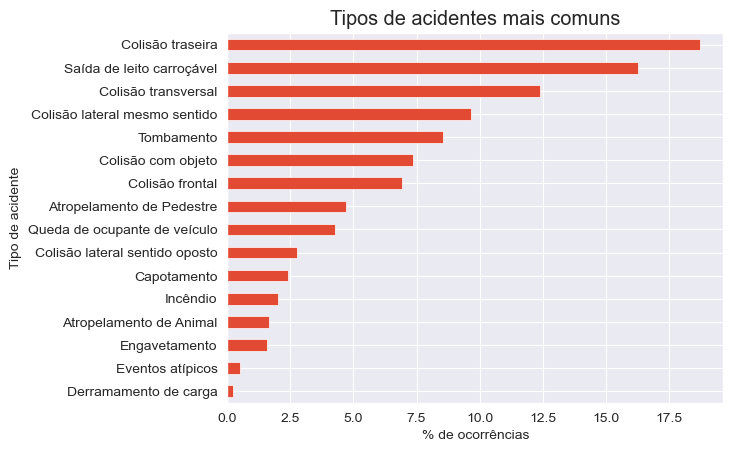

In [316]:
tipo_acidente.sort_values(ascending=False).plot(kind='barh', title = 'Tipos de acidentes mais comuns').invert_yaxis()

plt.xlabel("% de ocorrências")
plt.ylabel("Tipo de acidente")
plt.show()

## 2) Em quais rodovias ocorreram o maior número de acidentes?

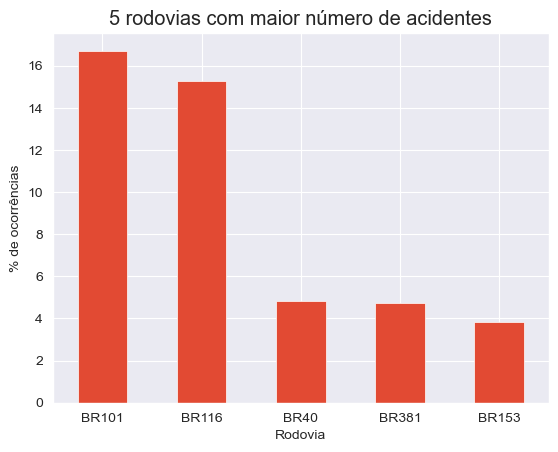

In [235]:
rodovia = df['br'].value_counts(normalize=True)*100

rodovia.sort_values(ascending=False).head().plot(kind='bar', title = '5 rodovias com maior número de acidentes')

plt.xlabel("Rodovia")
plt.ylabel("% de ocorrências")
plt.xticks(rotation=0)
plt.show()

# 3) Quais estados tiverem o maior número de acidentes?

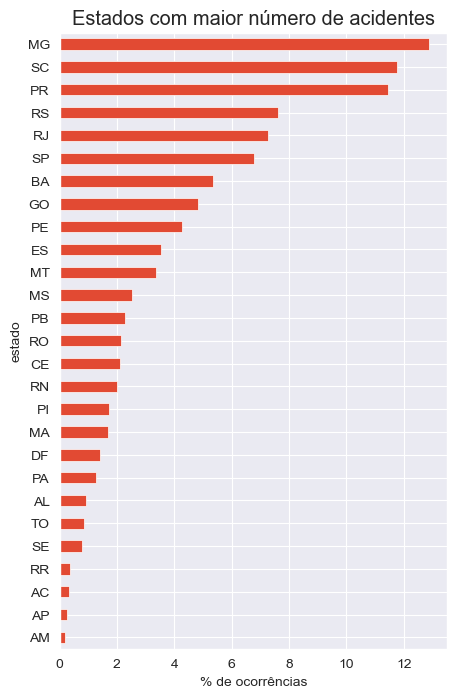

In [315]:
estados = df['uf'].value_counts(normalize=True) * 100

estados.sort_values(ascending=False)\
        .plot(kind='barh', title = 'Estados com maior número de acidentes', figsize=(5,8))\
        .invert_yaxis()

plt.xlabel("% de ocorrências")
plt.ylabel("estado")
plt.show()

# 4) Em qual mês do ano ocorreu o maior número de acidentes?

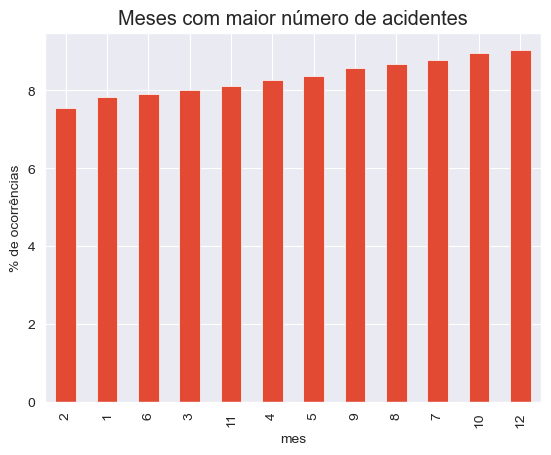

In [281]:
#meses = ['janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']

mes = df['mes'].value_counts(normalize=True) * 100

mes.sort_values().plot(kind='bar', title = 'Meses com maior número de acidentes')\

plt.xlabel("mes")
plt.ylabel("% de ocorrências")
plt.show()

# 5) Qual dia e horário da semana ocorrem a maior parte dos acidentes?

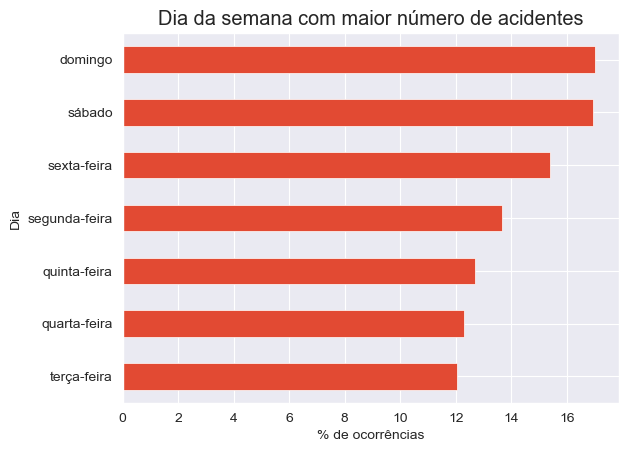

In [313]:
dia = df['dia_semana'].value_counts(normalize=True) * 100

dia.sort_values().plot(kind='barh', title = 'Dia da semana com maior número de acidentes')\

plt.xlabel("% de ocorrências")
plt.ylabel("Dia")
plt.show()

# 6) Quais causas geraram maior número de acidentes?

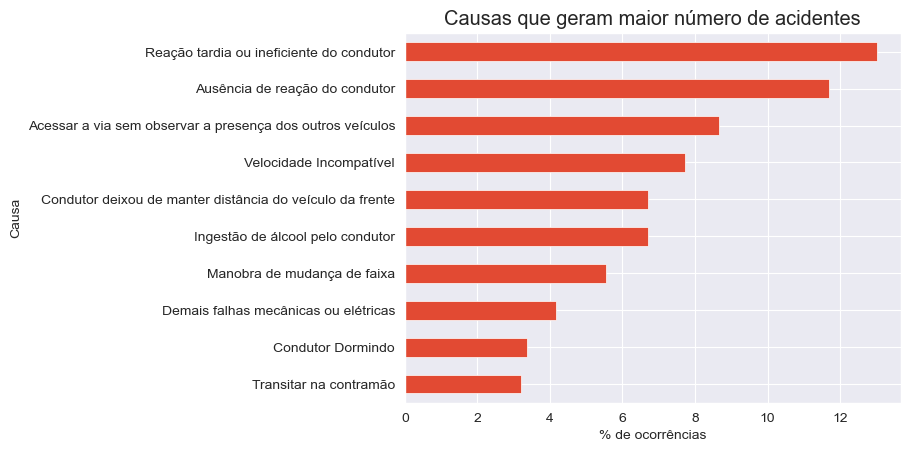

In [311]:
causa = df['causa_acidente'].value_counts(normalize=True) * 100

causa.sort_values(ascending=False)\
    .head(10)\
    .plot(kind='barh', title = 'Causas que geram maior número de acidentes')\
    .invert_yaxis()

plt.xlabel("% de ocorrências")
plt.ylabel("Causa")
plt.show()

# 7) Sob quais condições climáticas ocorrem a maioria dos acidentes?

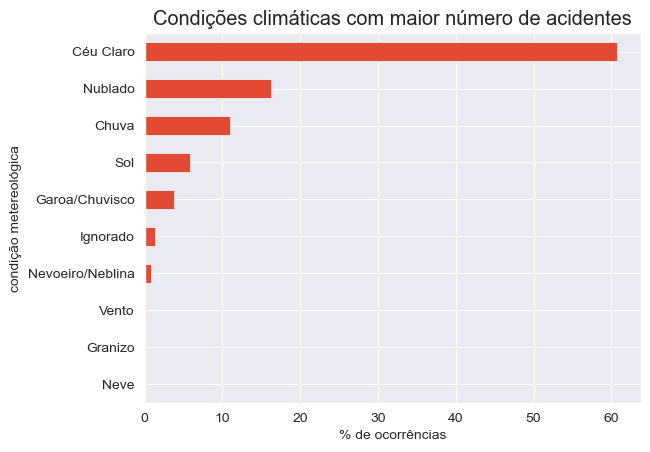

In [319]:
condicao = df['condicao_metereologica'].value_counts(normalize=True) * 100

condicao.sort_values().plot(kind='barh', title = 'Condições climáticas com maior número de acidentes')\

plt.xlabel("% de ocorrências")
plt.ylabel("condição metereológica")
plt.show()

# 8) Em quais tipos de pista ocorrem a maioria dos acidentes?

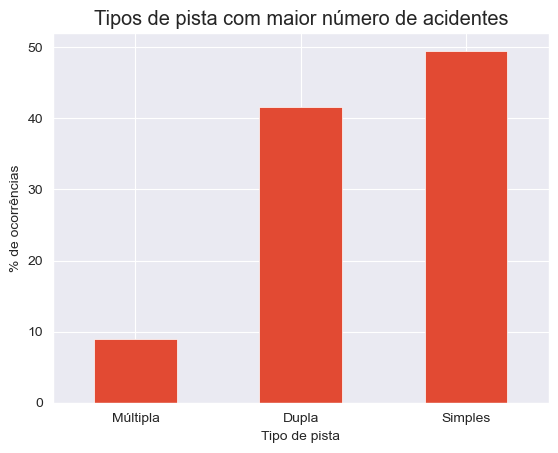

In [322]:
tipo_pista = df['tipo_pista'].value_counts(normalize=True) * 100

tipo_pista.sort_values().plot(kind='bar', title = 'Tipos de pista com maior número de acidentes')\

plt.xlabel("Tipo de pista")
plt.ylabel("% de ocorrências")
plt.xticks(rotation=0)
plt.show()

# Análises em relação ao acidentes com vitimas fatais

# Qual a porcentagem de mortos com relação ao número de pessoas acidentadas?

In [330]:
# 3,5% das pessoas acidentadas vieram a óbito em 2022.

df['mortos'].sum()/df['pessoas'].sum()*100

3.5129108360533885

# Quais tipos de acidentes com vítimas fatais mais ocorreram?


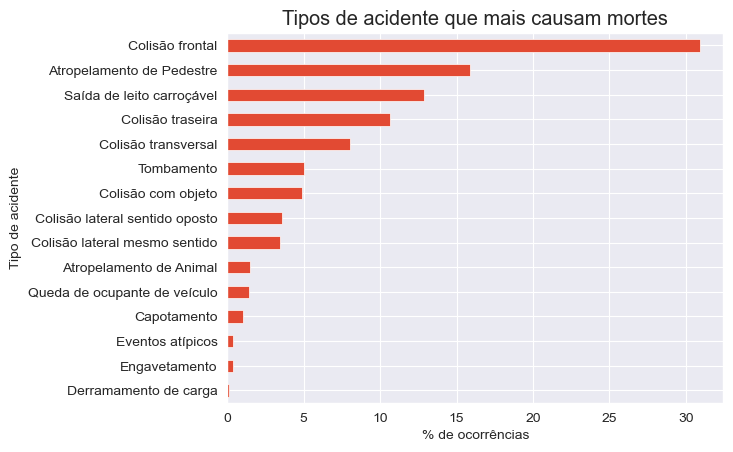

In [357]:
df_mortos_filtro = df[df['mortos'] > 0]

df_mortos = df_mortos_filtro.groupby('tipo_acidente')['mortos']\
            .sum()\
            .sort_values(ascending=False)/df['mortos'].sum()*100

df_mortos = df_mortos.plot(kind='barh', title='Tipos de acidente que mais causam mortes')\
                     .invert_yaxis()

plt.xlabel("% de ocorrências")
plt.ylabel("Tipo de acidente")
plt.show()

# Em quais rodovias ocorreram o maior número de acidentes com vítimas fatais?


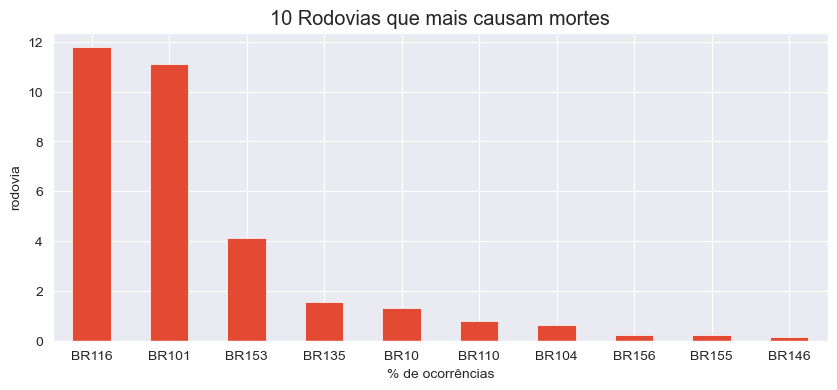

In [375]:
df_mortos_rodovias = df_mortos_filtro.groupby('br')['mortos']\
                                     .sum()\
                                     .head(10)\
                                     .sort_values(ascending=False)/df['mortos'].sum()*100

df_mortos_rodovias2 = df_mortos_rodovias.plot(kind='bar', title='10 Rodovias que mais causam mortes', figsize=(10,4))\

plt.xlabel("% de ocorrências")
plt.ylabel("rodovia")
plt.xticks(rotation=0)
plt.show()

# Quais estados tiveram o maior número de acidentes com vítimas fatais?


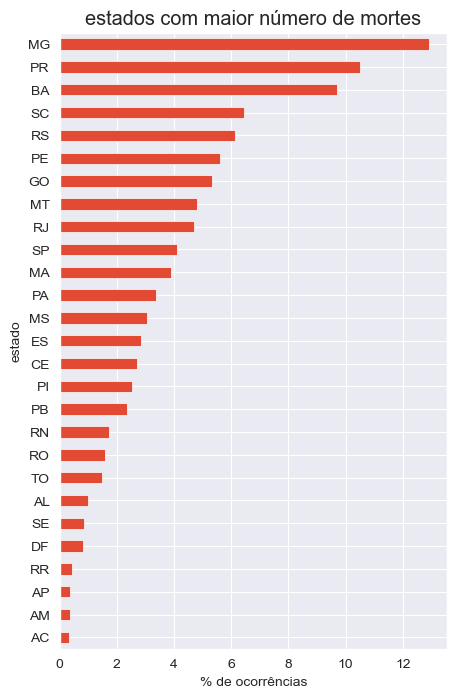

In [391]:
df_mortos_estado1 = df_mortos_filtro.groupby('uf')['mortos']\
                                    .sum()\
                                    .sort_values(ascending=False)/df['mortos'].sum()*100

df_mortos_estado = df_mortos_estado1.plot(kind='barh', title='estados com maior número de mortes', figsize=(5,8))\
                                    .invert_yaxis()

plt.xlabel("% de ocorrências")
plt.ylabel("estado")
plt.xticks(rotation=0)
plt.show()

# Em qual mês do ano ocorreu o maior número de acidentes com vítimas fatais?


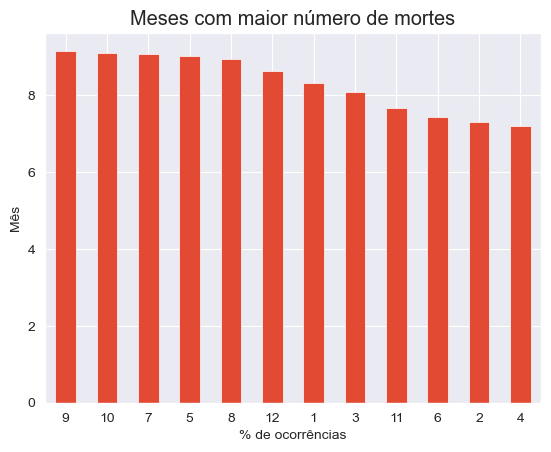

In [392]:
df_mortos_mes1 = df_mortos_filtro.groupby('mes')['mortos']\
                                    .sum()\
                                    .sort_values(ascending=False)/df['mortos'].sum()*100

df_mortos_mes = df_mortos_mes1.plot(kind='bar', title='Meses com maior número de mortes')\
                                    

plt.xlabel("% de ocorrências")
plt.ylabel("Mês")
plt.xticks(rotation=0)
plt.show()

# Qual dia e horário da semana ocorrem a maior parte dos acidentes com vítimas fatais?


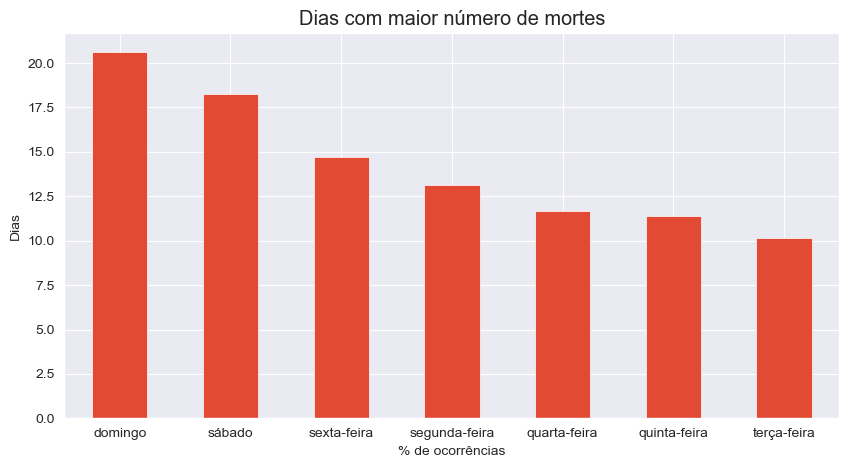

In [397]:
df_mortos_dia1 = df_mortos_filtro.groupby('dia_semana')['mortos']\
                                    .sum()\
                                    .sort_values(ascending=False)/df['mortos'].sum()*100

df_mortos_dia = df_mortos_dia1.plot(kind='bar', title='Dias com maior número de mortes', figsize=(10,5))\
                                    

plt.xlabel("% de ocorrências")
plt.ylabel("Dias")
plt.xticks(rotation=0)
plt.show()

# Quais causas geraram maior número de acidentes com vítimas fatais?

In [414]:
df_mortos_filtro['causa_acidente'].value_counts()

Transitar na contramão                                       620
Reação tardia ou ineficiente do condutor                     492
Ausência de reação do condutor                               461
Velocidade Incompatível                                      409
Acessar a via sem observar a presença dos outros veículos    322
                                                            ... 
Sinalização mal posicionada                                    2
Fumaça                                                         1
Faixas de trânsito com largura insuficiente                    1
Deixar de acionar o farol da motocicleta (ou similar)          1
Participar de racha                                            1
Name: causa_acidente, Length: 63, dtype: int64

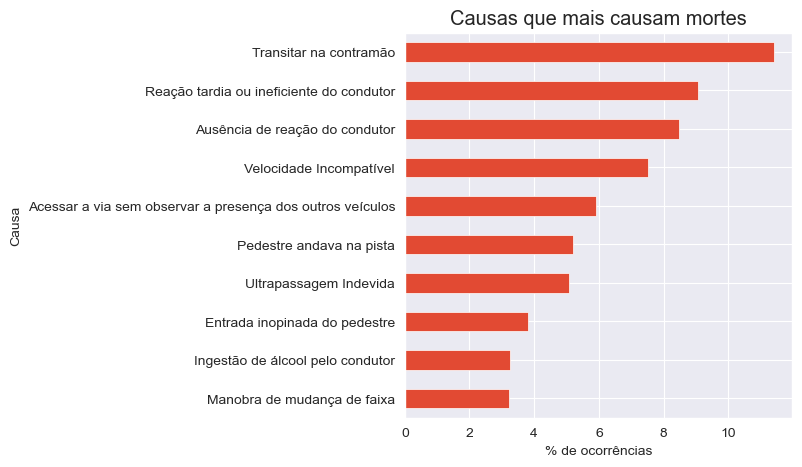

In [421]:
df_mortos_causa1 = df_mortos_filtro['causa_acidente'].value_counts()\
                                    .head(10)\
                                    .sort_values(ascending=False)/df['mortos'].sum()*100
df_mortos_causa1
df_mortos_causa = df_mortos_causa1.plot(kind='barh', title='Causas que mais causam mortes', figsize=(5,5))\
                                  .invert_yaxis()
                                    

plt.xlabel("% de ocorrências")
plt.ylabel("Causa")
plt.xticks(rotation=0)
plt.show()

# Correlação

In [298]:
df_corr = df[['pessoas','mortos','feridos_leves','feridos_graves','ilesos','ignorados','feridos']].corr()

<Axes: >

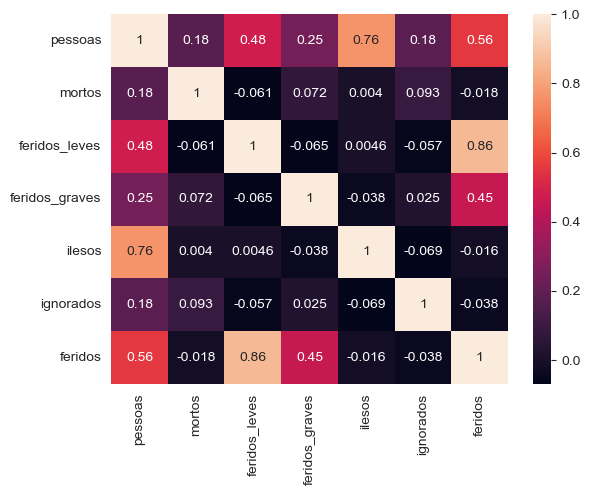

In [299]:
sns.heatmap(df_corr, annot=True)

# Insights

- 3 em cada 100 pessoas que sofreram acidentes nas rodovias em 2022 vieram a óbito;
- A BR101 e a BR116 são, com bastante folga, as rodovias que mais causaram acidentes em 2022;
- Minas Gerais, Santa Catarina e Paraná são os estados onde mais ocorrem acidentes, com uma certa margem;
- Dezembro é o mês com maior número de acidentes, provavelmente por conta das comemorações de final de ano;
- Colisão traseira foi o tipo mais comum de acidente. No entanto, o tipo que mais causou mortes foi a colisão frontal;
- Transitar na contramão foi o que mais causou acidentes fatais;
- Domingo e sábado são os dias com maior número de acidentes, fatais ou não.

# Recomendações

- Investigar mais a fundo as causas raízes do porquê a BR101 e a BR116 causam bem mais acidentes;
- Avaliar as condições das estradas e intensificar a fiscalização em MG, SC e Paraná, principalmente no primeiro;
- Intensificar a fiscalização no mês de dezembro, próximo às datas comemorativas;
- Intensificar a fiscalização entre sexta e segunda-feira, com foco no sábado e no domingo;
- Políticas de conscientização e fiscalização mais rigorosa para que motoristas não transitem na contramão e causem acidentes frontais fatais.